In [3]:

import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_colwidth', None)

In [4]:
#Leer archivo fuente.cvs
df = pd.read_csv('ETL_keeptalent_prueba/data/df_nulos_gestionados.csv', index_col = 0)
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
0,51.0,No,rarely,684.0,unknown,6,3,unknown,162.0,1,M,51.0,3,5,research director,3,unknown,6462,7,no,13,3.00,3,40.0,234444.000000,19537.000000,0,11.318934,5,3.00,20,15,15,1972,unknown,Si
1,52.0,No,rarely,699.0,unknown,1,4,Life Sciences,259.0,3,M,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3.00,1,40.0,239988.000000,19999.000000,1,34.000000,5,3.00,33,11,9,1971,unknown,Si
2,42.0,No,rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3,M,58.0,3,5,manager,4,married,4933,1,no,11,3.00,4,40.0,230784.000000,19232.000000,0,22.000000,3,2.76,22,11,15,1981,manager - research & development,Si
3,47.0,No,rarely,359.0,unknown,2,4,Medical,unknown,1,F,82.0,3,4,research director,3,married,26703,3,unknown,19,3.00,2,40.0,206028.000000,17169.000000,2,11.318934,2,2.76,20,5,6,1976,unknown,No
4,46.0,No,rarely,1319.0,unknown,3,3,Technical Degree,unknown,1,F,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3.00,4,40.0,77732.233463,6477.686122,1,11.318934,5,3.00,19,2,8,1977,unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36.0,Yes,rarely,530.0,unknown,3,1,Life Sciences,967.0,3,M,51.0,2,3,sales executive,4,married,5518,1,unknown,11,3.15,1,40.0,123900.000000,10325.000000,1,11.318934,6,3.00,16,3,7,1987,unknown,No
1610,45.0,No,non-travel,805.0,unknown,4,2,unknown,972.0,3,M,57.0,3,2,laboratory technician,2,unknown,23163,1,unknown,12,3.00,2,40.0,53364.000000,4447.000000,0,11.318934,5,2.00,9,0,8,1978,unknown,Si
1611,39.0,No,rarely,903.0,unknown,13,5,unknown,unknown,1,M,41.0,4,3,sales executive,3,single,2560,0,no,18,3.00,4,40.0,77732.233463,6477.686122,0,9.000000,3,3.00,8,0,7,1984,unknown,Si
1612,36.0,No,non-travel,1229.0,unknown,8,4,Technical Degree,990.0,1,M,84.0,3,2,sales executive,4,divorced,25952,4,no,13,3.15,4,40.0,77732.233463,6477.686122,2,12.000000,3,3.00,7,0,7,1987,unknown,Si


In [5]:
# Creación de nueva categoria basada en su satisfaccion laboral

df["grupos"] = df["jobsatisfaction"].apply(lambda x: 'A' if x >= 3 else 'B')
df[["jobsatisfaction", "grupos", "attrition"]]


,jobsatisfaction,grupos,attrition
0,3,A,No
1,3,A,No
2,4,A,No
3,3,A,No
4,1,B,No
...,...,...,...
1609,4,A,Yes
1610,2,B,No
1611,3,A,No
1612,4,A,No


In [6]:
# Visualizar los empleados que han dejado la empresa

df[["jobsatisfaction", "grupos", "attrition"]][df["attrition"] == "Yes"]

,jobsatisfaction,grupos,attrition
13,3,A,Yes
16,2,B,Yes
26,4,A,Yes
43,1,B,Yes
52,1,B,Yes
...,...,...,...
1588,2,B,Yes
1600,4,A,Yes
1602,3,A,Yes
1604,4,A,Yes


In [7]:
# Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

df["attrition_num"] = df["attrition"].apply(lambda x:0 if x == "No" else 1)
df["attrition_num"]

# Calculamos la tasa de rotación
df["tasa_rotacion"] = df["attrition_num"] / df["jobsatisfaction"]
df["tasa_rotacion"]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1609    0.25
1610    0.00
1611    0.00
1612    0.00
1613    0.00
Name: tasa_rotacion, Length: 1614, dtype: float64

In [23]:
df[["jobsatisfaction", "grupos", "attrition", "attrition_num", "tasa_rotacion"]].head(50)

,jobsatisfaction,grupos,attrition,attrition_num,tasa_rotacion
0,3,A,No,0,0.000000
1,3,A,No,0,0.000000
2,4,A,No,0,0.000000
3,3,A,No,0,0.000000
4,1,B,No,0,0.000000
5,4,A,No,0,0.000000
6,1,B,No,0,0.000000
7,3,A,No,0,0.000000
8,1,B,No,0,0.000000
9,3,A,No,0,0.000000


Text(0.5, 1.0, 'Tasa de Rotación')

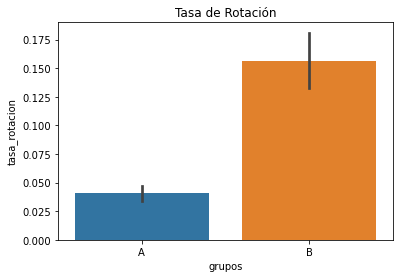

In [21]:
# Análisis estadístico de grupos A y B

# Gráfico: Tasa de Conversión (CR)
sns.barplot(x="grupos", y="tasa_rotacion", data=df)
plt.title("Tasa de Rotación")

En el gráfico observamos que cuanto menor es la satisfacción del empleado, mayor tasa de rotación existe.
Calculo homogeneidad y normalidad de la tasa de rotacion de los dos grupos

In [10]:
# NORMALIDAD

def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [11]:
normalidad(df, "tasa_rotacion")

Para la columna tasa_rotacion los datos no siguen una distribución normal.


In [12]:
# HOMOGENEIDAD

def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, A y B
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [13]:
homogeneidad(df, "grupos", "tasa_rotacion")

Para la métrica tasa_rotacion, las varianzas no son homogéneas entre grupos.


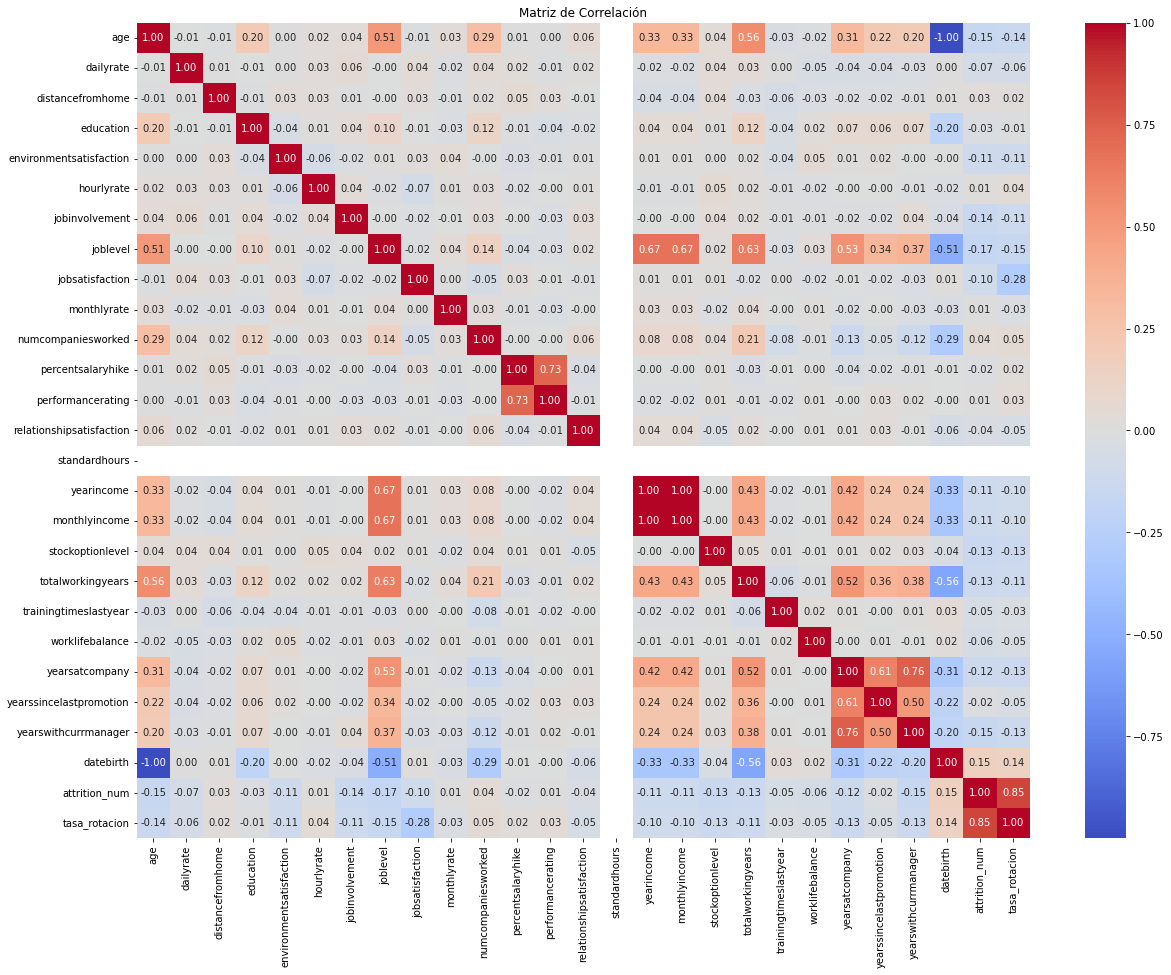

In [14]:
# INDEPENDENCIA

# Visualizar la matriz de correlación con tamaño ajustado
correlacion_matrix = df.corr()
plt.figure(figsize=(20, 15))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [15]:
# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
grupo_a = df[df['grupos'] == 'A']
grupo_b = df[df['grupos'] == 'B']
t_stat, p_ttest = ttest_ind(grupo_a['tasa_rotacion'], grupo_b['tasa_rotacion'])
print(f"Prueba t para tasa_rotacion entre A y B - p-valor: {p_ttest}")
##Al ser menor que 0.05 concluyo que hay una diferencia significativa entre los dos grupos

Prueba t para tasa_rotacion entre A y B - p-valor: 1.0762168180158606e-23


In [16]:
# Cumple los supuestos de no normalidad, no homogeneidad e independencia. En el mapa pbservamos que la mayoría de relaciones están por debajo de 0,3, por lo que realizamos el Test de Man Withney. 

In [27]:
# vamos a crear una función para calcular este test y ver si hay diferencias entre los grupos de estudio

def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "grupos"):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columnas_metricas (list): Una lista de nombres de columnas que representan las métricas a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. Por defecto, "campaign_name".

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes. Siendo el p-value: {p_value} y el statistic: {u_statistic}")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales. Siendo el p-value: {p_value} y el statistic: {u_statistic}")

In [28]:
test_man_whitney(df, ["tasa_rotacion"], "A", "B")

Para la métrica tasa_rotacion, las medianas son diferentes. Siendo el p-value: 2.3297787719497335e-06 y el statistic: 280488.0


Existen diferencias estadísticamente significativas. Confirmamos que la tasa de rotación es mayor entre los trabajadores que tienen una menor calificación de satisfacción (<3). 